<a href="https://colab.research.google.com/github/lucarenz1997/recommender_systems/blob/main/Modell-Based-Coll-Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/lucarenz1997/recommender_systems/blob/main/Modell-Based-Coll-Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modell-Based-Coll-Filtering
** Authors **: Rafaella and Luca

## 1. Setup

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load & data prep

In [11]:
#Load data
data_sample_prep = pd.read_csv("/content/drive/MyDrive/Recommender/sample_preprocessed.csv")
data_sample_prep.head(100)

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,days_since_release,genre_popularity,media_popularity,artist_popularity,album_popularity,songs_listened,song_popularity_7d,artist_popularity_7d,album_popularity_7d,month
0,10,2016-11-12 22:01:41,3092645,299421,1,2002-12-31,2,1,198,1,...,5065,12408,1,45,17,24,0,6,1,11
1,1129,2016-11-10 02:28:23,2247915,224543,0,2005-12-05,0,0,223,0,...,3993,249,11,309,16,66,2,46,2,11
2,10,2016-11-02 07:41:53,917717,103376,0,2005-08-22,0,0,201,0,...,4090,12408,13,21,17,87,1,1,1,11
3,0,2016-11-24 17:23:28,132625720,14101012,0,2016-09-23,0,0,187,0,...,62,168707,324,584,465,10,35,81,69,11
4,7,2016-11-11 11:55:23,921901,103798,0,1998-01-07,1,0,264,0,...,6883,42397,32,138,32,11,7,25,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,2016-11-01 16:42:12,2225892,222779,22,2004-12-31,2,1,262,0,...,4323,42397,1,1,1,7,0,0,0,11
96,723,2016-11-10 04:25:50,6744852,623660,0,2010-06-14,0,0,173,0,...,2341,730,1,3,1,104,0,0,0,11
97,7,2016-11-21 10:03:31,63103296,6197720,16,2011-06-13,2,1,265,0,...,1988,42397,2,148,32,5,1,26,8,11
98,297,2016-11-03 12:02:38,1044131,114005,3,1995-04-25,0,0,224,0,...,7863,6518,145,222,176,36,34,46,38,11


## Surprise data format

In [12]:
#Select relevant columns
data_sample_prep_sel = data_sample_prep[['user_id', 'media_id', 'is_listened']]  # Wichtige Spalten für das SVD-Modell

reader = Reader(rating_scale=(0, 1))  #Binary values (0 = not heard, 1 = heard)
data = Dataset.load_from_df(data_sample_prep_sel[['user_id', 'media_id', 'is_listened']], reader)

#Split training and test data
trainset, testset = train_test_split(data, test_size=0.2)

# Prep

In [13]:
#Initialize and train the SVD model
model = SVD(n_factors=50, reg_all=0.1, n_epochs=20)
model.fit(trainset)

#Create test set & make predictions
testset = trainset.build_testset()
predictions = model.test(testset)


🔍 **Optimaler Schwellenwert für F1-Score: 0.50 mit F1: 0.8686**

🔎 **Modell Evaluierung mit optimalem Schwellenwert:**
✅ Accuracy: 0.8057
✅ Precision: 0.8088
✅ Recall: 0.9380
✅ F1 Score: 0.8686
✅ Precision@10: 0.6839

🎵 **Top 10 Empfehlungen für Benutzer 123:**

1. Song ID: 14681034, Predicted Score: 0.669
2. Song ID: 14681034, Predicted Score: 0.669
3. Song ID: 14681034, Predicted Score: 0.669
4. Song ID: 1109835, Predicted Score: 0.575
5. Song ID: 94727052, Predicted Score: 0.552
6. Song ID: 2275911, Predicted Score: 0.549
7. Song ID: 16418245, Predicted Score: 0.548
8. Song ID: 132434634, Predicted Score: 0.544
9. Song ID: 75867424, Predicted Score: 0.541
10. Song ID: 3766766, Predicted Score: 0.532


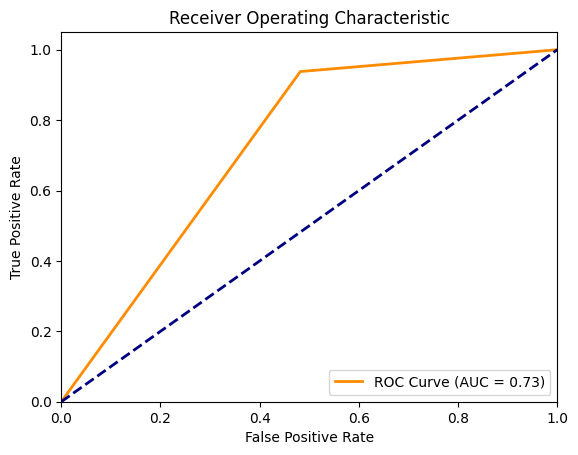

In [14]:
#Threshold optimization for F1 score
best_threshold = 0.5
best_f1 = 0

#Test threshold values between 0.1 and 0.9
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_true = [true_r for (_, _, true_r, _, _) in predictions]  # Wahre Labels
    y_pred = [1 if est >= threshold else 0 for (_, _, _, est, _) in predictions]  # Binär transformierte Vorhersagen

    f1 = f1_score(y_true, y_pred, zero_division=1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\n🔍 **Optimaler Schwellenwert für F1-Score: {best_threshold:.2f} mit F1: {best_f1:.4f}**")

# **8. Evaluierung mit optimalem Schwellenwert**
y_true = [true_r for (_, _, true_r, _, _) in predictions]
y_pred = [1 if est >= best_threshold else 0 for (_, _, _, est, _) in predictions]

accuracy_val = accuracy_score(y_true, y_pred)
precision_val = precision_score(y_true, y_pred, zero_division=1)
recall_val = recall_score(y_true, y_pred, zero_division=1)
f1_val = f1_score(y_true, y_pred, zero_division=1)

# **9. Ergebnisse ausgeben**
print("\n🔎 **Modell Evaluierung mit optimalem Schwellenwert:**")
print(f"✅ Accuracy: {accuracy_val:.4f}")
print(f"✅ Precision: {precision_val:.4f}")
print(f"✅ Recall: {recall_val:.4f}")
print(f"✅ F1 Score: {f1_val:.4f}")

# **10. Precision@K Berechnung**
def precision_at_k(predictions, k=10, threshold=best_threshold):
    user_precisions = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        relevance = (est >= threshold)
        user_precisions[uid].append((est, relevance))

    precision_scores = []
    for uid, user_ratings in user_precisions.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]
        num_relevant = sum((relevance for _, relevance in top_k))
        precision = num_relevant / k
        precision_scores.append(precision)

    return np.mean(precision_scores) if precision_scores else 0

precision_k = precision_at_k(predictions, k=10)
print(f"✅ Precision@10: {precision_k:.4f}")

# **11. Top-N Empfehlungen für Benutzer generieren**
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n(predictions, n=10)

# **12. Top-10 Empfehlungen für einen Beispiel-Benutzer**
user_id = 123  # Beispiel-Benutzer-ID
if user_id in top_n_recommendations:
    print(f"\n🎵 **Top 10 Empfehlungen für Benutzer {user_id}:**\n")
    for i, (song_id, score) in enumerate(top_n_recommendations[user_id], 1):
        print(f"{i}. Song ID: {song_id}, Predicted Score: {score:.3f}")
else:
    print(f"⚠ Keine Empfehlungen für Benutzer {user_id}.")

# **13. ROC-Kurve und AUC visualisieren**
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
